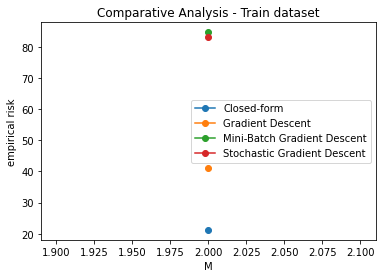

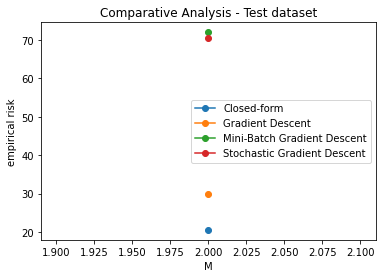

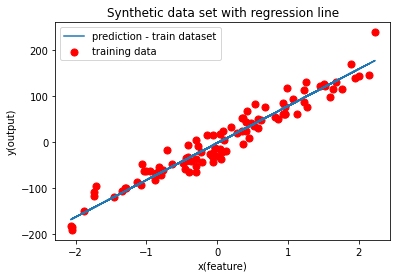

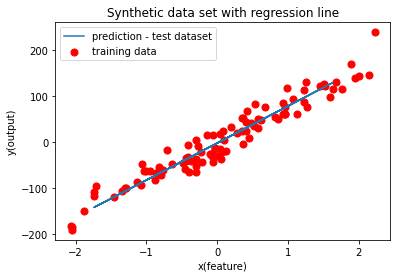

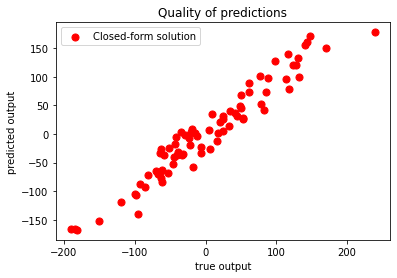

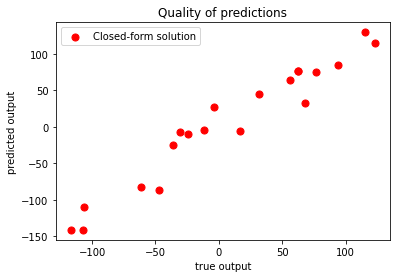

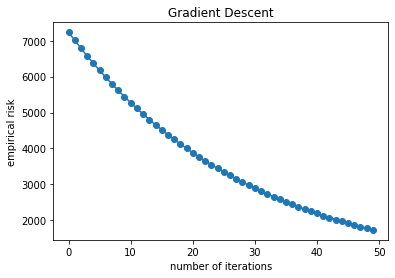

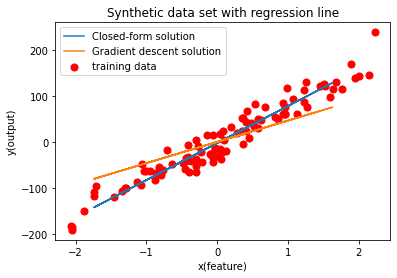

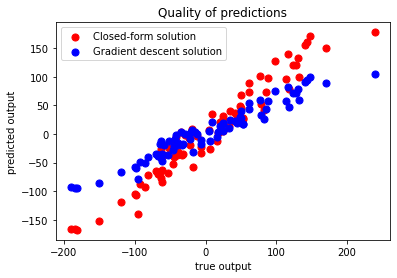

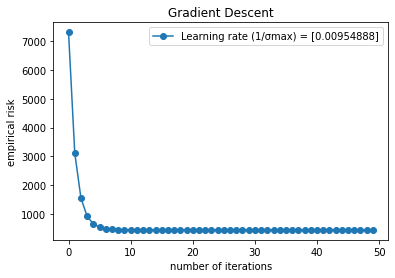

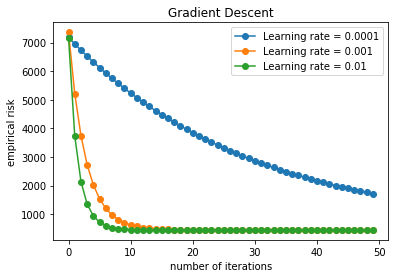

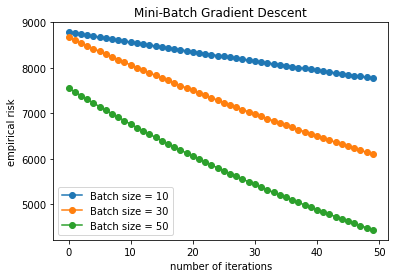

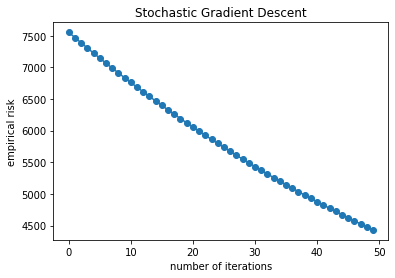

In [22]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import math

class LinearRegression(object):

    def closed_form(self, X, t):
       
        N, D = X.shape
        
        self.w = np.zeros(D)
        self.w = np.linalg.pinv(X) @ t
        
    def gradient_descent(self, X, t, lr=0.0001, epochs=50):
        
        N, D = X.shape
        
        MSE = []
        iterations = []
        self.w = np.random.randn((D))

        for k in range(epochs):
            
#             y = []

#             for length in range(len(X)):
#                 y.append(X[length] @ self.w)

#             y = np.array(y)
            
            y = X @ self.w

            MSE.append(mean_squared_error(y, t))
            iterations.append(k)

            for j in range(M):
                gradient = np.zeros(D)
                
                for i in range(N):
                    gradient += (y[i] - t[i]) * X[i]
                    
                self.w -= lr * gradient
        
        self.MSE = MSE
        self.iterations = iterations
        
    def mini_batch_gradient_descent(self, X, t, batch_size, lr=0.0001, epochs=50):
        
        _, D = X.shape
             
        MSE = []
        iterations = []
        self.w = np.random.randn((D))
        
        indices = np.arange(0, batch_size, 1)
        X_batch = X[indices]
        t_batch = t[indices]
        
        for k in range(epochs):
            
#             y = []

#             for length in range(len(X_batch)):
#                 y.append(X_batch[length] @ self.w)

#             y = np.array(y)
            
            y = X_batch @ self.w

            MSE.append(mean_squared_error(y, t_batch))
            iterations.append(k)

            for j in range(batch_size):
                gradient = np.zeros(D)
                gradient += 1/batch_size * np.transpose(X_batch) @ (y - t_batch)
                self.w -= lr * gradient
            
        self.MSE = MSE
        self.iterations = iterations

    def stochastic_gradient_descent(self, X, t, batch_size=1, lr=0.0001, epochs=50):
        
        N, D = X.shape
        
        MSE = []
        iterations = []
        self.w = np.random.randn((D))
            
        for k in range(epochs):
            indices = np.random.choice(N, batch_size, replace=False)
            X_batch = X[indices]
            t_batch = t[indices]
            
#             y = []

#             for length in range(len(X_batch)):
#                 y.append()

#             y = np.array(y)
            
            y = X_batch @ self.w

            MSE.append(mean_squared_error(y, t_batch))
            iterations.append(k)

            for j in range(batch_size):
                gradient = np.zeros(D)
                gradient += 1/batch_size * np.transpose(X_batch) @ (y - t_batch)
                self.w -= lr * gradient
        
        self.MSE = MSE
        self.iterations = iterations

    def predict(self, X, return_std=False):
        
        N, D = X.shape
        
        y = np.zeros(N)
        y = X @ self.w
        
        return y
    
def create_simple_dataset():

    # Simple dataset
    n_samples = 100
    n_features = 1
    noise = 20
    
    X, y = datasets.make_regression(n_samples=n_samples, n_features=n_features, n_informative=1, noise=noise, random_state=37)
    
    return X, y
    
def create_complex_dataset():

    # Complex dataset
    n_samples = 300
    
    x = np.linspace(-10, 10, n_samples) # coordinates
    noise_sample = np.random.normal(0,0.5,n_samples)
    sine_wave = x + np.sin(4*x) + noise_sample
    
    return x, sine_wave

def extract_polynomial_features(X, M):
    phi = np.zeros((X.shape[0], M+1))
    
    for length in range(X.shape[0]):
        for width in range(M):
            phi[length][width] = pow(X[length], width)
            
    return phi

def mean_squared_error(y, t):
    return np.mean(pow((y - t), 2))

def root_mean_squared_error(y, t):
    return np.sqrt(np.mean(pow((y - t), 2)))

def calculate_max_eigenvalue(X):
    return max(np.linalg.eig(np.transpose(X) @ X))

X, y = create_simple_dataset()

train_samples = int(.8 * len(X))
X_train = X[:train_samples]
y_train = y[:train_samples]
X_test  = X[train_samples:]
y_test  = y[train_samples:]

M_list = [2]

MSE_train_cf = []
MSE_train_gd = []
MSE_train_mbgd = []
MSE_train_sgd = []

MSE_test_cf = []
MSE_test_gd = []
MSE_test_mbgd = []
MSE_test_sgd = []

RMSE_train_cf = []
RMSE_train_gd = []
RMSE_train_mbgd = []
RMSE_train_sgd = []

RMSE_test_cf = []
RMSE_test_gd = []
RMSE_test_mbgd = []
RMSE_test_sgd = []

for M in M_list:
    
    X_train_feat = extract_polynomial_features(X_train, M)
    X_test_feat = extract_polynomial_features(X_test, M)

    model_cf = LinearRegression()
    model_gd = LinearRegression()
    model_mbgd = LinearRegression()
    model_sgd = LinearRegression()

    model_cf.closed_form(X_train_feat, y_train)
    model_gd.gradient_descent(X_train_feat, y_train)
    model_mbgd.mini_batch_gradient_descent(X_train_feat, y_train, M)
    model_sgd.stochastic_gradient_descent(X_train_feat, y_train)

    predict_train_cf = np.zeros(X_train.size)
    predict_test_cf = np.zeros(X_test.size)
    predict_train_cf = model_cf.predict(X_train_feat)
    predict_test_cf = model_cf.predict(X_test_feat)

    predict_train_gd = np.zeros(X_train.size)
    predict_test_gd = np.zeros(X_test.size)
    predict_train_gd = model_gd.predict(X_train_feat)
    predict_test_gd = model_gd.predict(X_test_feat)

    predict_train_mbgd = np.zeros(X_train.size)
    predict_test_mbgd = np.zeros(X_test.size)
    predict_train_mbgd = model_mbgd.predict(X_train_feat)
    predict_test_mbgd = model_mbgd.predict(X_test_feat)

    predict_train_sgd = np.zeros(X_train.size)
    predict_test_sgd = np.zeros(X_test.size)
    predict_train_sgd = model_sgd.predict(X_train_feat)
    predict_test_sgd = model_sgd.predict(X_test_feat)
    
    MSE_train_cf.append(mean_squared_error(predict_train_cf, y_train))
    MSE_train_gd.append(mean_squared_error(predict_train_gd, y_train))
    MSE_train_mbgd.append(mean_squared_error(predict_train_mbgd, y_train))
    MSE_train_sgd.append(mean_squared_error(predict_train_sgd, y_train))
    
    RMSE_train_cf.append(root_mean_squared_error(predict_train_cf, y_train))
    RMSE_train_gd.append(root_mean_squared_error(predict_train_gd, y_train))
    RMSE_train_mbgd.append(root_mean_squared_error(predict_train_mbgd, y_train))
    RMSE_train_sgd.append(root_mean_squared_error(predict_train_sgd, y_train))
    
    MSE_test_cf.append(mean_squared_error(predict_test_cf, y_test))
    MSE_test_gd.append(mean_squared_error(predict_test_gd, y_test))
    MSE_test_mbgd.append(mean_squared_error(predict_test_mbgd, y_test))
    MSE_test_sgd.append(mean_squared_error(predict_test_sgd, y_test))
    
    RMSE_test_cf.append(root_mean_squared_error(predict_test_cf, y_test))
    RMSE_test_gd.append(root_mean_squared_error(predict_test_gd, y_test))
    RMSE_test_mbgd.append(root_mean_squared_error(predict_test_mbgd, y_test))
    RMSE_test_sgd.append(root_mean_squared_error(predict_test_sgd, y_test))
    
plt.plot(M_list, RMSE_train_cf, "-o", label="Closed-form")
plt.plot(M_list, RMSE_train_gd, "-o", label="Gradient Descent")
plt.plot(M_list, RMSE_train_mbgd, "-o", label="Mini-Batch Gradient Descent")
plt.plot(M_list, RMSE_train_sgd, "-o", label="Stochastic Gradient Descent")
plt.title("Comparative Analysis - Train dataset")
plt.xlabel("M")
plt.ylabel("empirical risk")
plt.legend()
plt.show()

plt.plot(M_list, RMSE_test_cf, "-o", label="Closed-form")
plt.plot(M_list, RMSE_test_gd, "-o", label="Gradient Descent")
plt.plot(M_list, RMSE_test_mbgd, "-o", label="Mini-Batch Gradient Descent")
plt.plot(M_list, RMSE_test_sgd, "-o", label="Stochastic Gradient Descent")
plt.title("Comparative Analysis - Test dataset")
plt.xlabel("M")
plt.ylabel("empirical risk")
plt.legend()
plt.show()

plt.scatter(X, y, facecolor="r", edgecolor="r", s=50, label="training data")
plt.plot(X_train, predict_train_cf, label="prediction - train dataset")
plt.title("Synthetic data set with regression line")
plt.xlabel("x(feature)")
plt.ylabel("y(output)")
plt.legend()
plt.show()

plt.scatter(X, y, facecolor="r", edgecolor="r", s=50, label="training data")
plt.plot(X_test, predict_test_cf, label="prediction - test dataset")
plt.title("Synthetic data set with regression line")
plt.xlabel("x(feature)")
plt.ylabel("y(output)")
plt.legend()
plt.show()

plt.scatter(y_train, predict_train_cf, facecolor="r", edgecolor="r", s=50, label="Closed-form solution")
plt.title("Quality of predictions")
plt.xlabel("true output")
plt.ylabel("predicted output")
plt.legend()
plt.show()

plt.scatter(y_test, predict_test_cf, facecolor="r", edgecolor="r", s=50, label="Closed-form solution")
plt.title("Quality of predictions")
plt.xlabel("true output")
plt.ylabel("predicted output")
plt.legend()
plt.show()

plt.plot(model_gd.iterations, model_gd.MSE, "-o")
plt.title("Gradient Descent")
plt.xlabel("number of iterations")
plt.ylabel("empirical risk")
plt.show()

plt.scatter(X, y, facecolor="r", edgecolor="r", s=50, label="training data")
plt.plot(X_test, predict_test_cf, label="Closed-form solution")
plt.plot(X_test, predict_test_gd, label="Gradient descent solution")
plt.title("Synthetic data set with regression line")
plt.xlabel("x(feature)")
plt.ylabel("y(output)")
plt.legend()
plt.show()

plt.scatter(y_train, predict_train_cf, facecolor="r", edgecolor="r", s=50, label="Closed-form solution")
plt.scatter(y_train, predict_train_gd, facecolor="b", edgecolor="b", s=50, label="Gradient descent solution")
plt.title("Quality of predictions")
plt.xlabel("true output")
plt.ylabel("predicted output")
plt.legend()
plt.show()

lr_eigenvalue = 1/calculate_max_eigenvalue(X)
model_gd.gradient_descent(X_train_feat, y_train, lr=lr_eigenvalue)
plt.plot(model_gd.iterations, model_gd.MSE, "-o", label = "Learning rate (1/σmax) = " + str(lr_eigenvalue))
plt.title("Gradient Descent")
plt.xlabel("number of iterations")
plt.ylabel("empirical risk")
plt.legend()
plt.show()

lr_list = [0.0001, 0.001, 0.01]

for lr in lr_list:
    model_gd = LinearRegression()
    model_gd.gradient_descent(X_train_feat, y_train, lr=lr)
    plt.plot(model_gd.iterations, model_gd.MSE, "-o", label = "Learning rate = " + str(lr))
plt.title("Gradient Descent")
plt.xlabel("number of iterations")
plt.ylabel("empirical risk")
plt.legend()
plt.show()

batch_size = [10, 30, 50]

for size in batch_size:
    model_mbgd = LinearRegression()
    model_mbgd.mini_batch_gradient_descent(X_train_feat, y_train, batch_size=size)
    plt.plot(model_mbgd.iterations, model_mbgd.MSE, "-o", label = "Batch size = " + str(size))
plt.title("Mini-Batch Gradient Descent")
plt.xlabel("number of iterations")
plt.ylabel("empirical risk")
plt.legend()
plt.show()

plt.plot(model_mbgd.iterations, model_mbgd.MSE, "-o")
plt.title("Stochastic Gradient Descent")
plt.xlabel("number of iterations")
plt.ylabel("empirical risk")
plt.show()
